In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


FILENAME = "drug_age.csv"
filepath = f"../data/{FILENAME}"

drug_age_df = pd.read_csv(filepath)

# Display the first few rows of the data
drug_age_df.head(8)

,age,time,start_time,end_time,setting,all drugs,all opioids,stimulants,cannabis,benzodiazepine
0,0-15 years,1,01/01/2020,01/31/2020,ip,7.7007,0.8450,0.1908,1.0358,0.2044
1,0-15 years,1,01/01/2020,01/31/2020,ed,4.0613,0.0239,0.0239,0.1117,0.0106
2,16-34 years,1,01/01/2020,01/31/2020,ip,28.1293,4.9320,3.0782,5.8844,1.1224
3,16-34 years,1,01/01/2020,01/31/2020,ed,31.2102,2.2127,1.8439,4.5482,0.4594
4,35-54 years,1,01/01/2020,01/31/2020,ip,39.7774,7.3291,5.6598,3.5135,1.4467
5,35-54 years,1,01/01/2020,01/31/2020,ed,46.4683,3.7108,3.3756,3.4989,0.8786
6,55+ years,1,01/01/2020,01/31/2020,ip,29.3764,2.8886,1.1386,0.5587,0.3848
7,55+ years,1,01/01/2020,01/31/2020,ed,46.8670,1.3921,1.0264,1.3451,0.2281


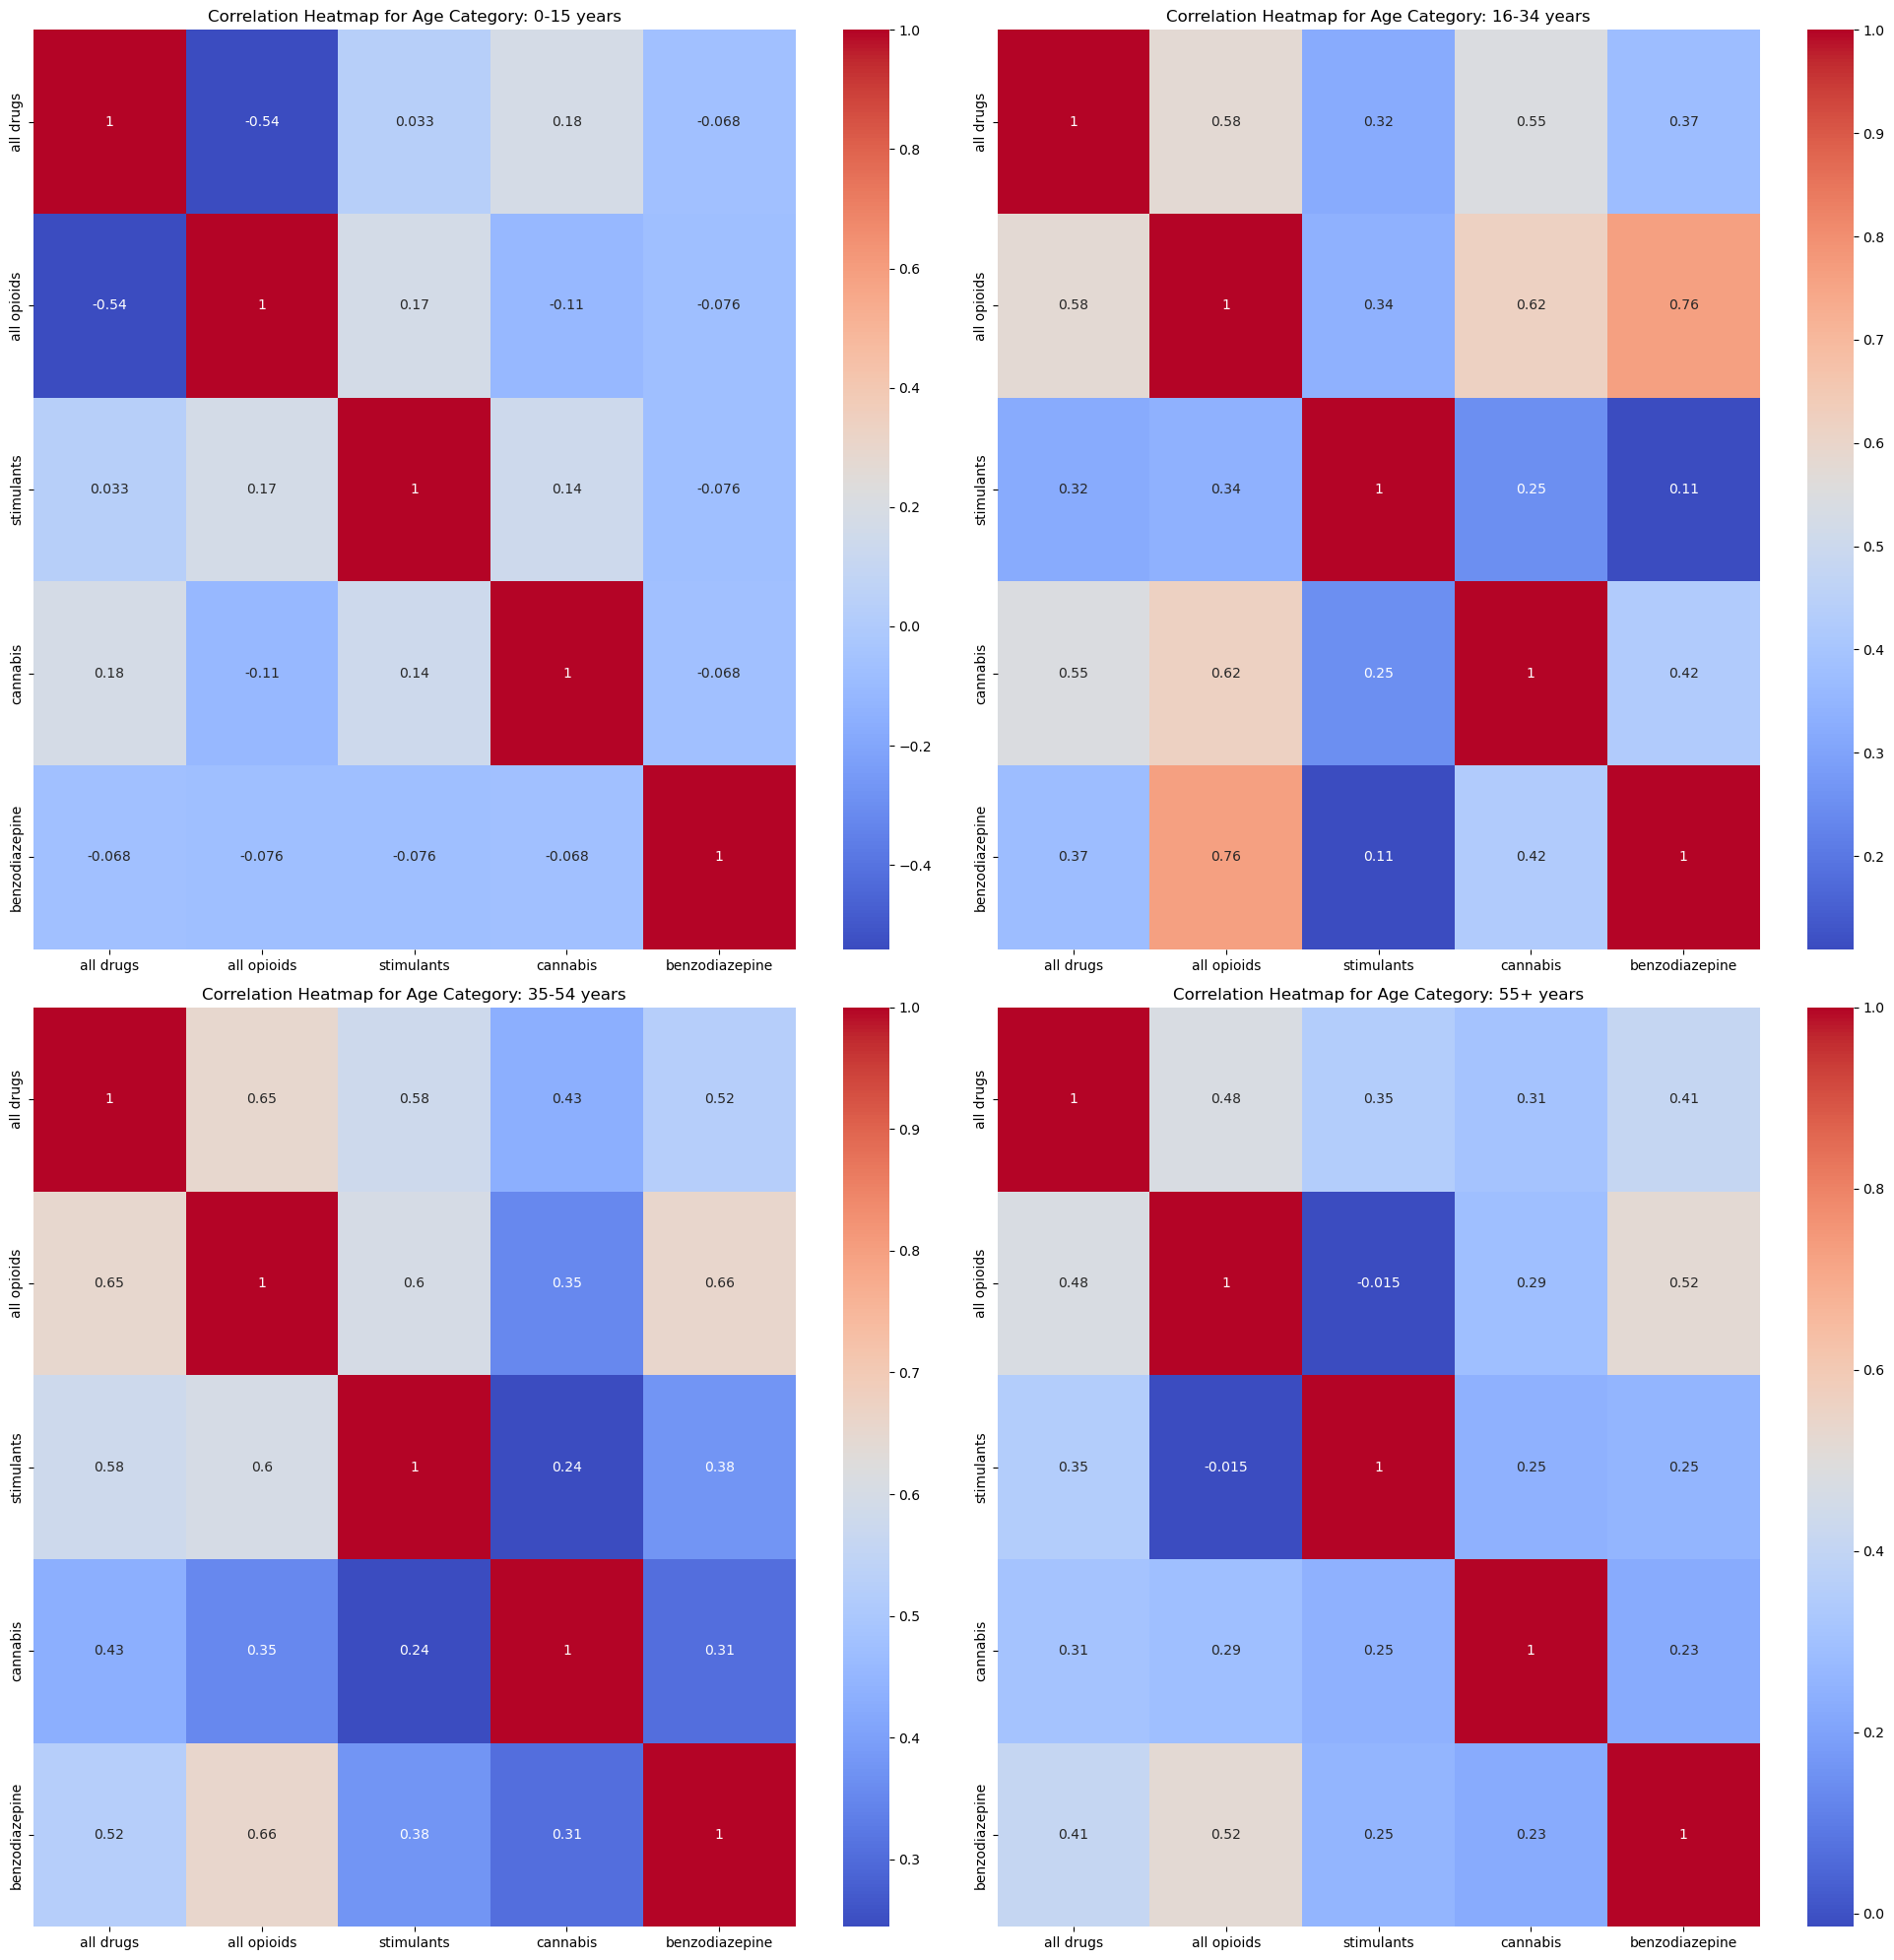

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# THIS IS FOR THE IP SETTING

# Read the data into a pandas DataFrame
data = drug_age_df

# Filter the data for the setting "ip"
filtered_data = data[data['setting'] == "ip"]

# Specify the age categories
age_categories = ['0-15 years', '16-34 years', '35-54 years', '55+ years']

# Create a 2x2 subplot figure
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Flatten the axes array to be able to iterate over it
axes = axes.flatten()

# Iterate over the age categories and axes
for age_category, ax in zip(age_categories, axes):
    # Filter the data for the specific age category
    age_data = filtered_data[filtered_data['age'] == age_category]

    # Calculate the correlation matrix
    correlation_matrix = age_data[['all drugs', 'all opioids', 'stimulants', 'cannabis', 'benzodiazepine']].corr()
    # Create the heatmap on the specific subplot axis
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)

    # Set the title for the subplot
    ax.set_title('Correlation Heatmap for Age Category: ' + age_category)

plt.tight_layout()
plt.show()

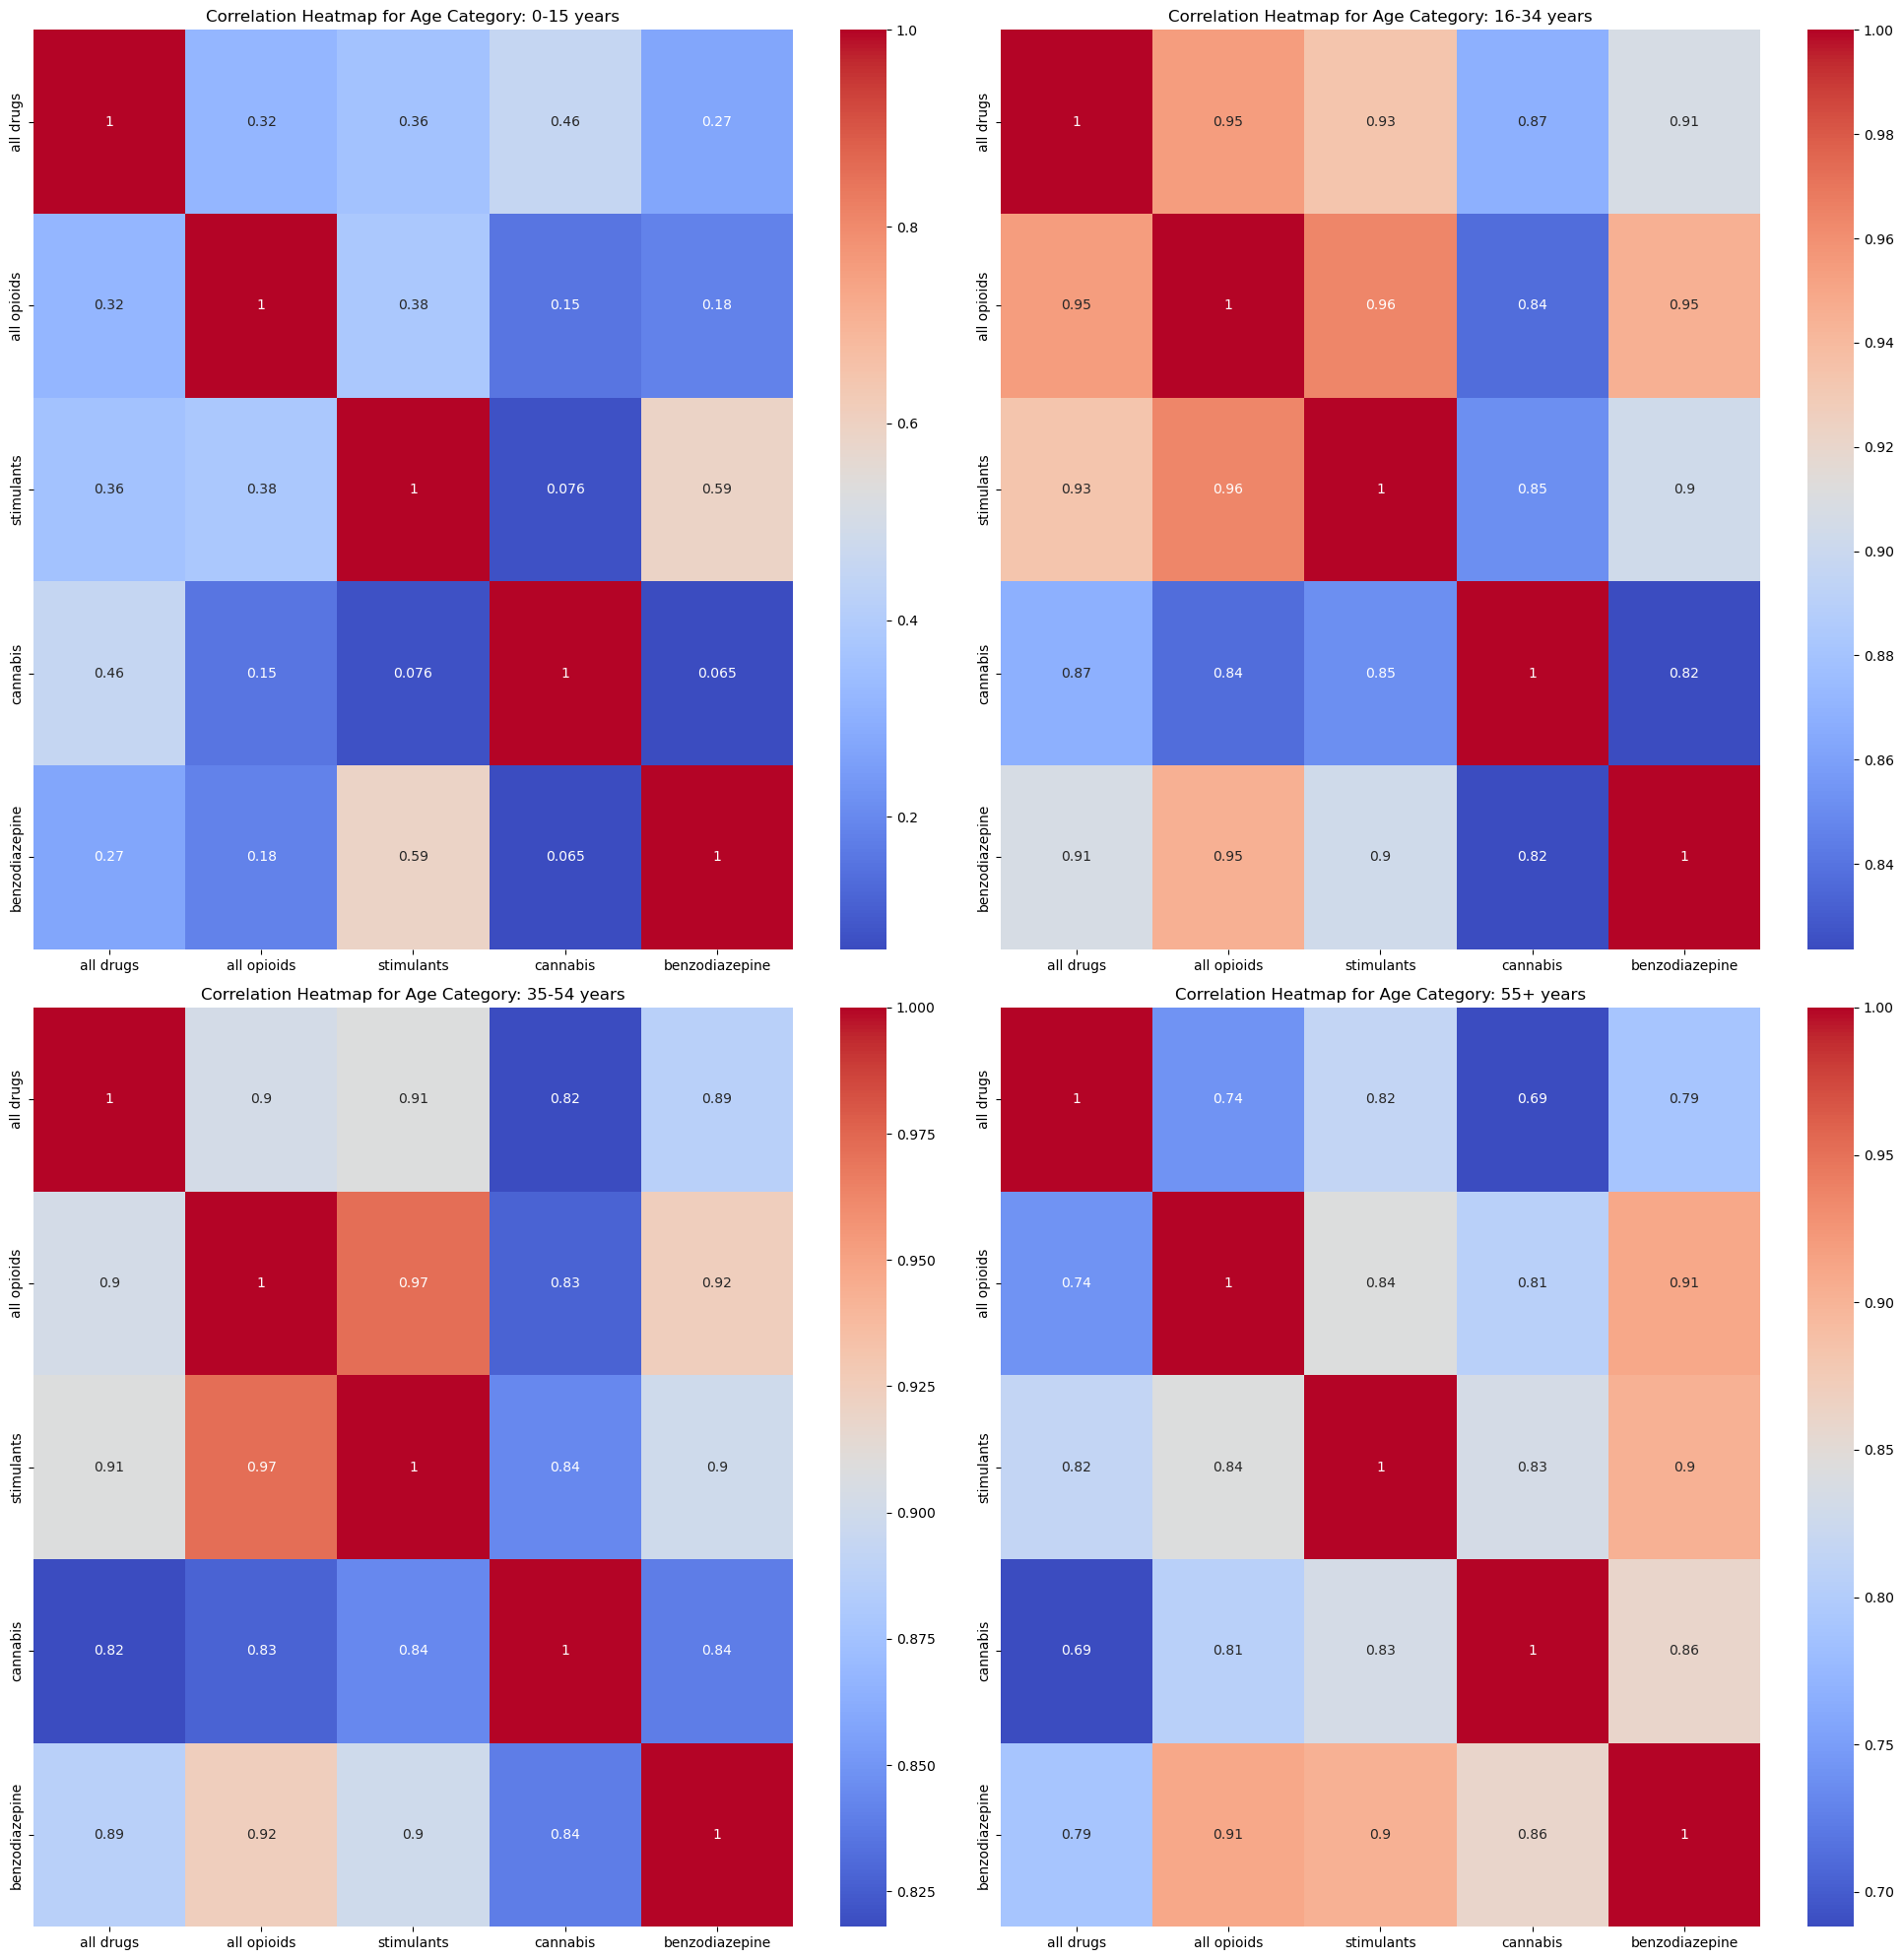

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# THIS IS FOR THE ED SETTING

# Read the data into a pandas DataFrame
data = drug_age_df

# Filter the data for the setting "ed"
filtered_data = data[data['setting'] == "ed"]

# Specify the age categories
age_categories = ['0-15 years', '16-34 years', '35-54 years', '55+ years']

# Create a 2x2 subplot figure
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Flatten the axes array to be able to iterate over it
axes = axes.flatten()

# Iterate over the age categories and axes
for age_category, ax in zip(age_categories, axes):
    # Filter the data for the specific age category
    age_data = filtered_data[filtered_data['age'] == age_category]

    # Calculate the correlation matrix
    correlation_matrix = age_data[['all drugs', 'all opioids', 'stimulants', 'cannabis', 'benzodiazepine']].corr()
    # Create the heatmap on the specific subplot axis
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)

    # Set the title for the subplot
    ax.set_title('Correlation Heatmap for Age Category: ' + age_category)

plt.tight_layout()
plt.show()

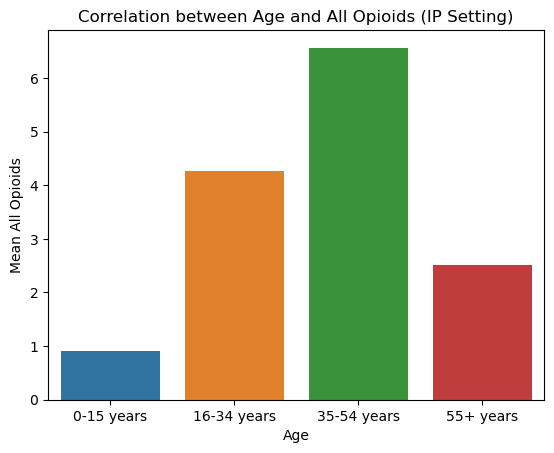

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'df' and the 'setting' column specifies if the row is 'ip' or 'ed'

# Filter the DataFrame to include only rows with 'ip' setting
ip_df = drug_age_df[drug_age_df['setting'] == 'ip']

# Create a pivot table to calculate mean 'age' and 'all opioids' for each age category
pivot_table = ip_df.pivot_table(values='all opioids', index='age', aggfunc='mean')

# Plot the correlation between 'age' and 'all opioids' using a bar plot
sns.barplot(x=pivot_table.index, y=pivot_table['all opioids'])
plt.xlabel('Age')
plt.ylabel('Mean All Opioids')
plt.title('Correlation between Age and All Opioids (IP Setting)')
plt.show()

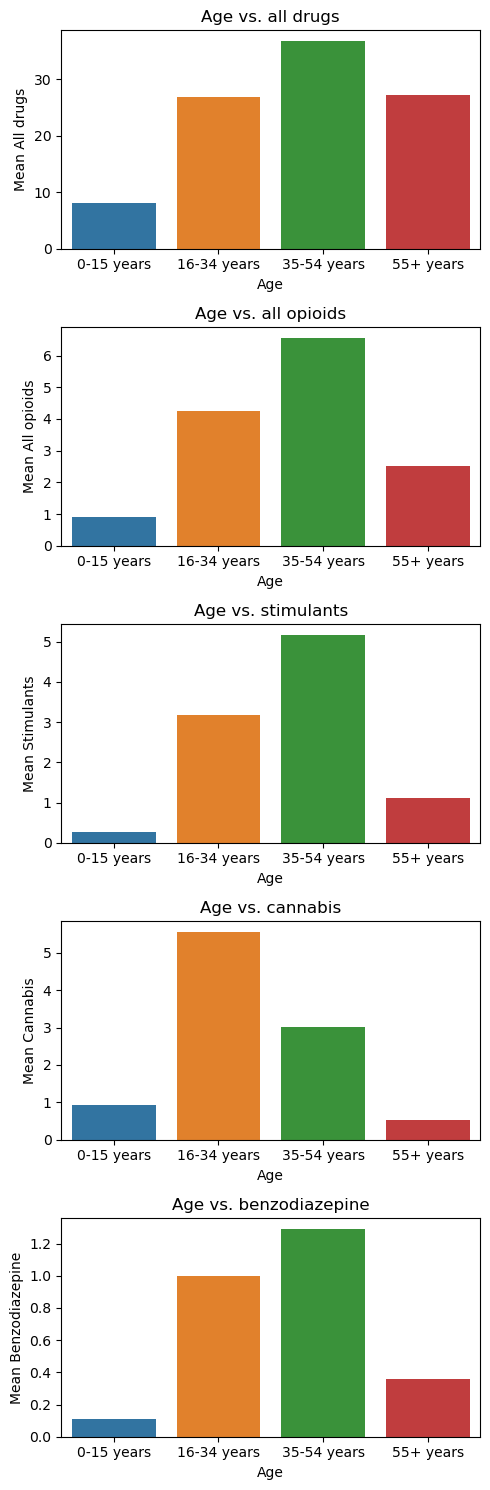

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'df' and the 'setting' column specifies if the row is 'ip' or 'ed'
# Filter the DataFrame to include only rows with 'ip' setting
ip_df = drug_age_df[drug_age_df['setting'] == 'ip']

# Define the list of drug categories to analyze
drug_categories = ['all drugs', 'all opioids', 'stimulants', 'cannabis', 'benzodiazepine']

# Set up the figure and axes for the subplots
fig, axs = plt.subplots(len(drug_categories), 1, figsize=(5, 15))
# Set up the figure and axes for the subplots with smaller figsize
# fig, axs = plt.subplots(len(drug_categories), 1, figsize=(10, 15))  # Here, (10, 15) determines the size of the figure

# Iterate over each drug category
for i, cat in enumerate(drug_categories):
    # Create a new dataframe aggregating by mean
    temp_df = ip_df.groupby('age')[cat].mean().reset_index()
    
    # Create the bar plot
    sns.barplot(data=temp_df, x='age', y=cat, ax=axs[i])
    
    # Set the plot labels
    axs[i].set_title('Age vs. {}'.format(cat))
    axs[i].set_xlabel('Age')
    axs[i].set_ylabel('Mean {}'.format(cat.capitalize()))

# Adjust the layout for better visualization
plt.tight_layout()

plt.show()